# digits con clasificadores generativos

Al igual que en iris, sklearn facilita el aprendizaje y evaluación de clasificadores generativos en digits.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

Lectura del corpus digits:

In [5]:
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.3, shuffle=True, random_state=23)

Veamos la precisión de naive Bayes Gaussiano en función de var_smoothing:

In [6]:
for v in [1e-9, 1e-5, 1e-1, .2, .5, 1]:
    clf = GaussianNB(var_smoothing=v).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de GaussianNB() es 81.7%
La precisión de GaussianNB(var_smoothing=1e-05) es 88.1%
La precisión de GaussianNB(var_smoothing=0.1) es 91.9%
La precisión de GaussianNB(var_smoothing=0.2) es 92.0%
La precisión de GaussianNB(var_smoothing=0.5) es 91.5%
La precisión de GaussianNB(var_smoothing=1) es 91.1%


LDA en función de tol:

In [7]:
for tol in np.logspace(-10,-2,5):
    clf = LinearDiscriminantAnalysis(tol=tol).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de LinearDiscriminantAnalysis(tol=1e-10) es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=1e-08) es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=1e-06) es 95.0%
La precisión de LinearDiscriminantAnalysis() es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=0.01) es 95.0%


QDA en función de reg_param:

In [8]:
for reg_param in [1e-3, 1e-2, 1e-1, .5, .9, 1]:
    clf = QuadraticDiscriminantAnalysis(tol=1e-20, reg_param=reg_param).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de QuadraticDiscriminantAnalysis(reg_param=0.001, tol=1e-20) es 95.6%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.01, tol=1e-20) es 96.1%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.1, tol=1e-20) es 97.4%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.5, tol=1e-20) es 98.7%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.9, tol=1e-20) es 99.4%
La precisión de QuadraticDiscriminantAnalysis(reg_param=1, tol=1e-20) es 90.2%


QDA con reg_param=0.9 obtiene un excelente precisión. Veamos entre qué pares de clases se producen los errores.

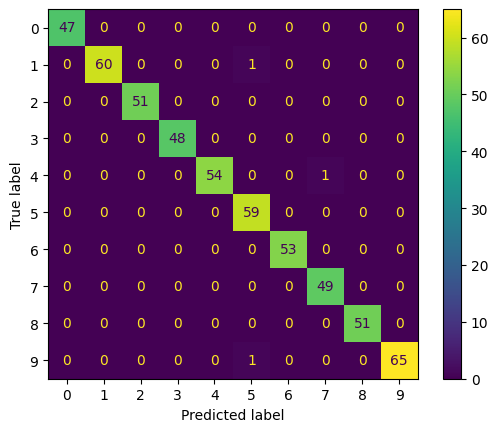

In [9]:
clf = QuadraticDiscriminantAnalysis(tol=1e-20, reg_param=0.9).fit(X_train, y_train)
ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test));

Una diferencia esencial entre los clasificadores generativos y los discriminativos es que los primeros pueden generar muestras (sintéticas) y los segundos no. Veamos algunos dígitos sintéticos generados con naive Bayes Gaussiano.

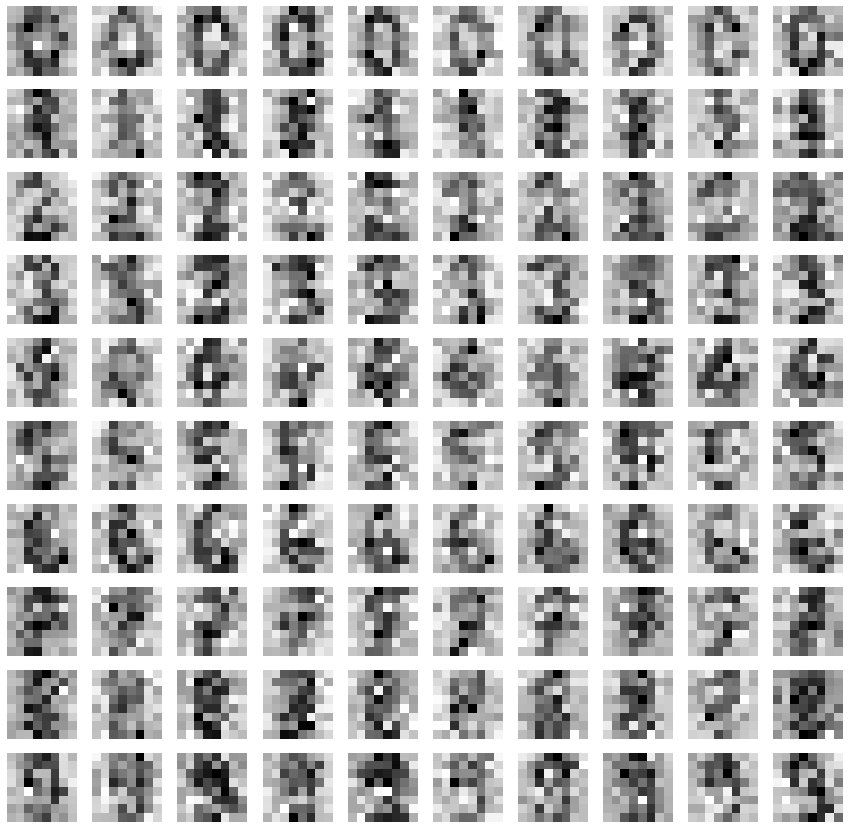

In [7]:
clf = GaussianNB(var_smoothing=0.2).fit(X_train, y_train)
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
for i in np.arange(0,10):
    X = multivariate_normal(mean=clf.theta_[i], cov=clf.var_[i], seed=23).rvs(10)
    for j in np.arange(0, 10):
        ax = axes[i,j]
        ax.set_axis_off()
        ax.imshow(X[j].reshape(8,8), cmap=plt.cm.gray_r, interpolation="none")

**Ejercicio:** genera dígitos manuscritos con lda y qda

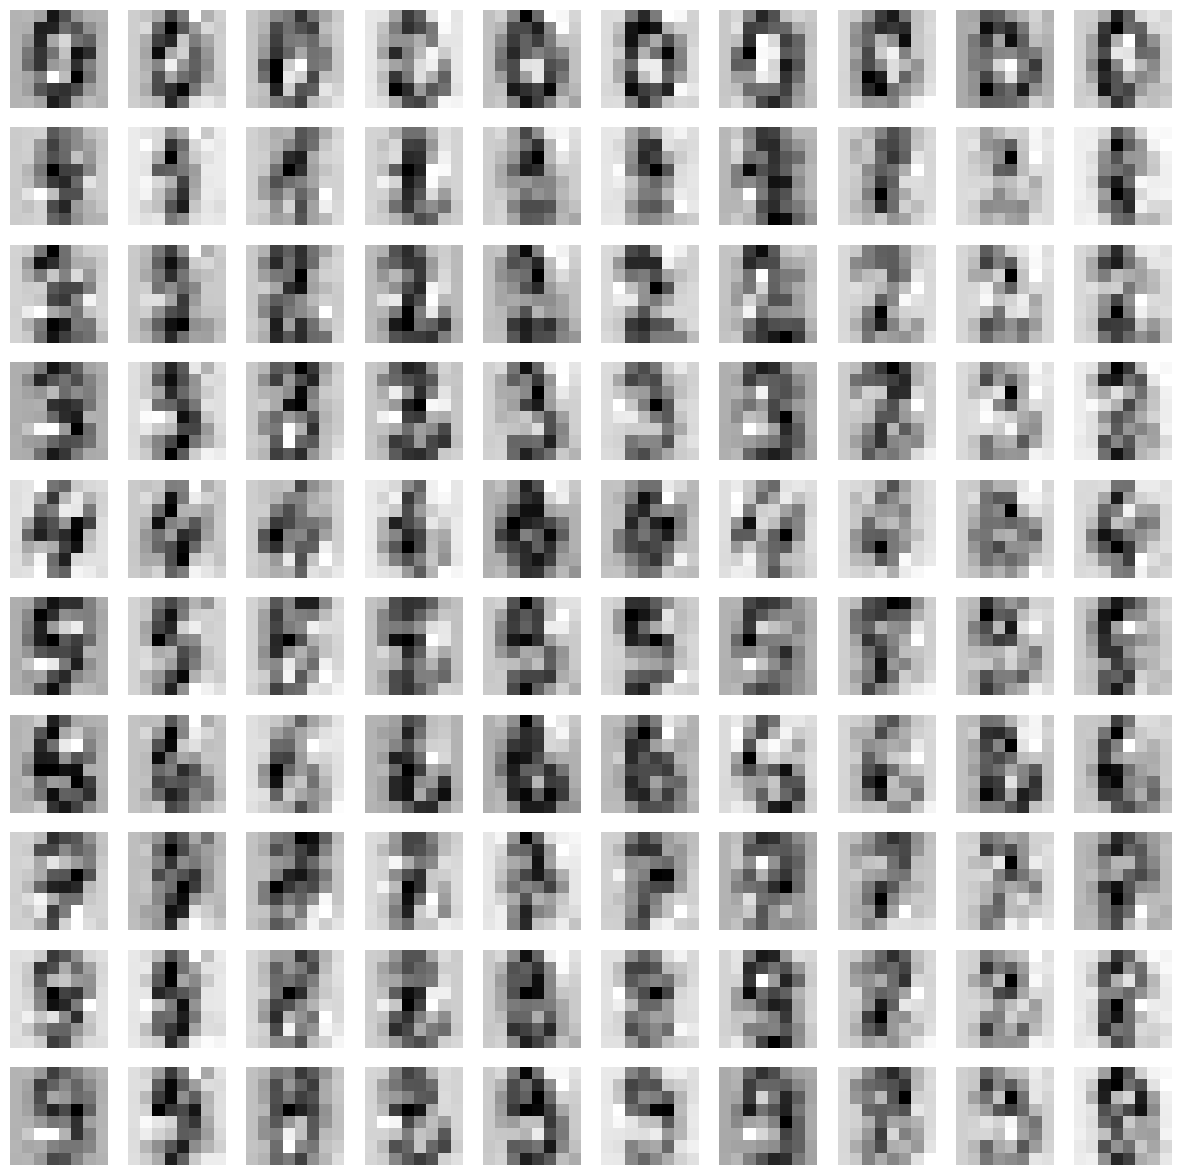

In [17]:
clf = LinearDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
for i in np.arange(0,10):
    X = multivariate_normal(mean=clf.means_[i], cov=clf.covariance_, allow_singular=True, seed=23).rvs(10)
    for j in np.arange(0, 10):
        ax = axes[i,j]
        ax.set_axis_off()
        ax.imshow(X[j].reshape(8,8), cmap=plt.cm.gray_r, interpolation="none")

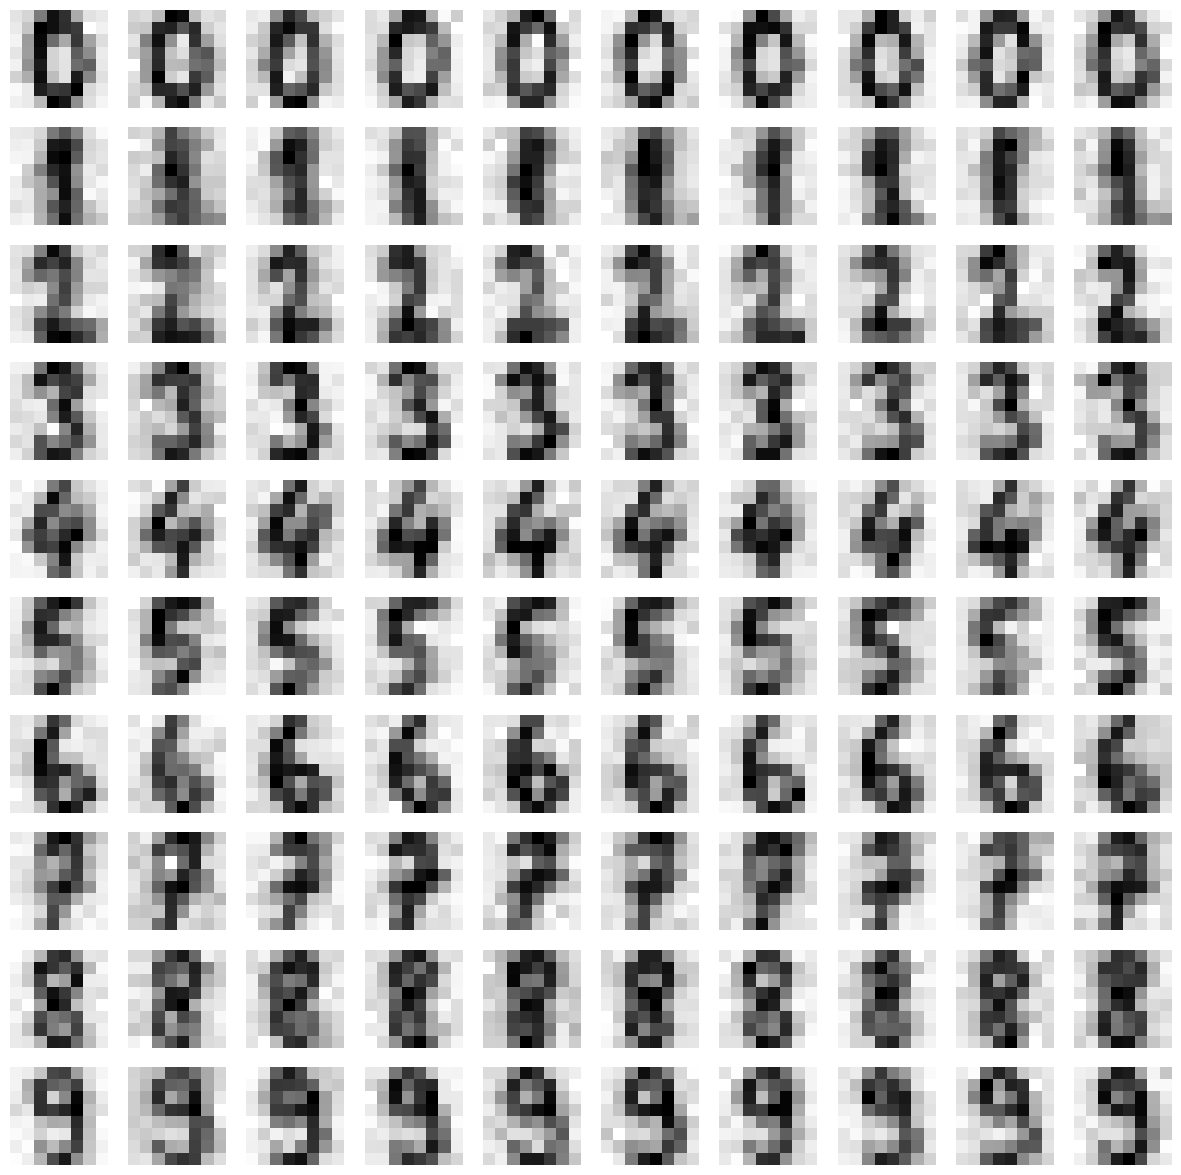

In [21]:
clf = QuadraticDiscriminantAnalysis(tol=1e-20, reg_param=0.9, store_covariance=True).fit(X_train, y_train)
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
for i in np.arange(0,10):
    X = multivariate_normal(mean=clf.means_[i], cov=clf.covariance_[i], seed=23).rvs(10)
    for j in np.arange(0, 10):
        ax = axes[i,j]
        ax.set_axis_off()
        ax.imshow(X[j].reshape(8,8), cmap=plt.cm.gray_r, interpolation="none")